In [1]:
import glucifer
import underworld as uw
from underworld import function as fn
import math
import numpy as np
from planetengine.utilities import quickShow

In [2]:
mesh = uw.mesh.FeMesh_Cartesian()


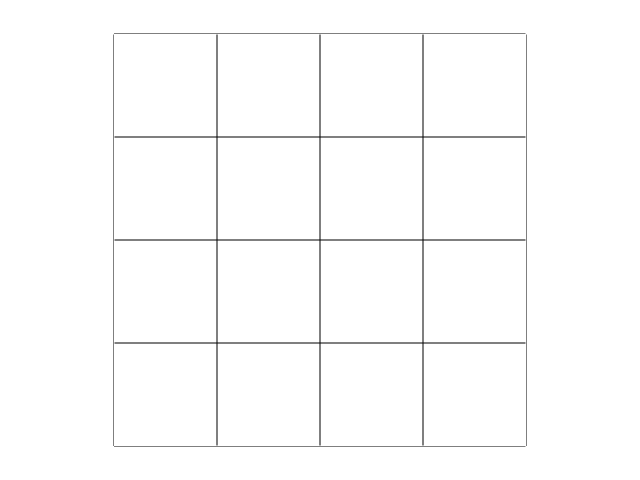

In [3]:
quickShow(mesh)

In [4]:
temperatureField = mesh.add_variable(nodeDofCount = 1)

In [5]:
maskVar = mesh.add_variable(nodeDofCount = 1)

In [6]:
import random

In [7]:
for index, thing in enumerate(temperatureField.data[:]):
    temperatureField.data[index] = random.random()


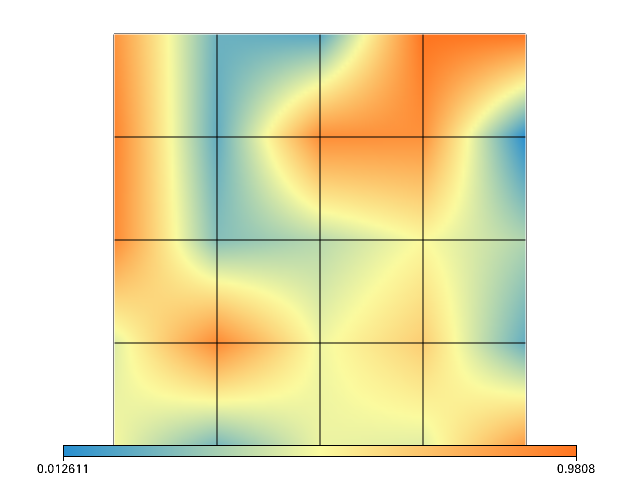

In [8]:
quickShow(mesh, temperatureField)

In [9]:
for index, val in enumerate(maskVar.data):
    if mesh.data[index][1] > 0.8:
        maskVar.data[index] = 1
    else:
        maskVar.data[index] = 0

In [10]:
xLim = (fn.misc.constant(0.2), fn.misc.constant(0.8))
yLim = (fn.misc.constant(0.8), fn.misc.constant(1.))

In [11]:
maskFn = fn.branching.conditional([
    ((xLim[0] < fn.input()[0] < xLim[1]) and (yLim[0] < fn.input()[1] < yLim[1]), 1.),
    (True, 0.),
    ])

In [12]:
maskFn.evaluate(mesh)

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [13]:
maskFn.evaluate(mesh)for index, val in enumerate(maskVar.data):
    if mesh.data[index][1] > 0.8:
        maskVar.data[index] = 1
    else:
        maskVar.data[index] = 0

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [14]:
(temperatureField * maskFn).evaluate(mesh)

array([[ 0.48520529],
       [ 0.193408  ],
       [ 0.46451098],
       [ 0.43701426],
       [ 0.83695292],
       [ 0.43001913],
       [ 0.90340121],
       [ 0.47157323],
       [ 0.66004725],
       [ 0.15113153],
       [ 0.90243163],
       [ 0.22891581],
       [ 0.34481727],
       [ 0.5027908 ],
       [ 0.32636951],
       [ 0.92598631],
       [ 0.14690473],
       [ 0.88904017],
       [ 0.87447936],
       [ 0.00940944],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

In [ ]:
temperatureField.evaluate(mesh)
maskFn.evaluate(mesh)

In [16]:
help(temperatureField * maskFn)

Help on multiply in module underworld.function._function object:

class multiply(Function)
 |  This class implements the product of two functions
 |  It is invoked by the overload method __mul__.
 |  
 |  Method resolution order:
 |      multiply
 |      Function
 |      underworld._stgermain.LeftOverParamsChecker
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fn1, fn2, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __abstractmethods__ = frozenset()
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from Function:
 |  
 |  __add__(self, other)
 |      Operator overloading for '+' operation:
 |      
 |      Fn3 = Fn1 + Fn2
 |      
 |      Creates a new function Fn3 which performs additions of Fn1 and Fn2.
 |      
 |      Returns
 |      -

In [ ]:
help(fn.shape)

In [ ]:
quickShow((mesh, temperatureField * maskFn))

In [ ]:
intMesh = uw.utils.Integral(
    1.,
    mesh,
    integrationType = 'volume',
    )
intMesh.evaluate()[0]

In [ ]:
intTemp = uw.utils.Integral(
    temperatureField,
    mesh,
    integrationType = 'volume',
    )
intTemp.evaluate()[0]

In [ ]:
intMeshMask = uw.utils.Integral(
    maskFn,
    mesh,
    integrationType = 'volume',
    )
intMeshMask.evaluate()[0]

In [ ]:
intTempMask = uw.utils.Integral(
    temperatureField * maskFn,
    mesh,
    integrationType = 'volume',
    )
intTempMask.evaluate()[0]

In [ ]:
intTemp.evaluate()[0] / intMesh.evaluate()[0]

In [ ]:
intTempMask.evaluate()[0] / intMeshMask.evaluate()[0]

In [ ]:
stickyAir = 0
mantle = 1
continent = 2

In [ ]:
erosionFn = fn.branching.map(
    fn_key = materialVar,
    mapping = {
        0: 0,
        1: fn.branching.conditional([
            (fn.input()[1] > threshold, 0),
            (True, 1)
            ]),
        2: fn.branching.conditional([
            (fn.input()[1] > threshold, 0),
            (True, 2)
            ]),
        3: fn.branching.conditional([
            (fn.input()[1] > threshold, 0),
            (True, 3)
            ]),
        }
    )

In [ ]:
materialVar.data[:] = erosionFn.evaluate(mesh)